<a id=top-page></a>
# Illustrative demonstartion of non-uniqueness introduced during low-dimensional data projection

In this notebook, we illustrate the non-uniqueness problem introduced during low-dimensional data projection. 

The analysis in this notebook is performed in the following steps:

- [Generate synthetic 3D data](#generate-data)
- [Top down projection](#top-down-projection)
- [Projection at an angle](#projection-at-angle)

***

In [1]:
%run -i imports.py
%matplotlib inline

In [2]:
bandwidth_values = np.logspace(-4.5, 2, 200)

In [3]:
def rotate_axes(angle_x, angle_y, angle_z):
    
    Rx = np.array([[1, 0, 0],
                   [0, np.cos(angle_x), -np.sin(angle_x)],
                   [0, np.sin(angle_x), np.cos(angle_x)]])
    
    Ry = np.array([[np.cos(angle_y), 0, np.sin(angle_y)],
               [0, 1, 0],
               [-np.sin(angle_y), 0, np.cos(angle_y)]])
    
    Rz = np.array([[np.cos(angle_z), -np.sin(angle_z), 0],
               [np.sin(angle_z), np.cos(angle_z), 0],
               [0, 0, 1]])
    
    rotation_matrix = np.dot(Rz, np.dot(Ry, Rx))
    
    return rotation_matrix

<a id=generate-data></a>
***

## Generate synthetic 3D data

[Go to the top](#top-page)

In [4]:
n_points = 200

x, y = np.meshgrid(np.linspace(-1,1,n_points), np.linspace(-1,1,n_points))
x = x.ravel()[:,None]
y = y.ravel()[:,None]

std=0.4

z = np.exp(-((x*x+y*y) / (2.0 * std**2))) * np.sin(10*x*y)
z = z.ravel()[:,None]
z = z/np.max(z)

data = np.hstack((x,y,z))

(n_observations, _) = np.shape(data)

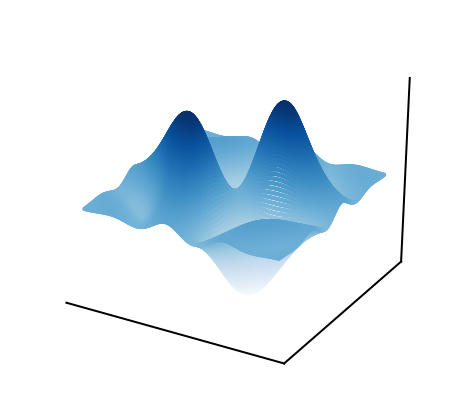

In [5]:
fig = plt.figure(figsize=(8, 7))
spec = fig.add_gridspec(ncols=1, nrows=1, width_ratios=[1], height_ratios=[1])
ax = fig.add_subplot(spec[0,0], projection='3d')
scat_a = ax.scatter(x, y, z, c=z.ravel(), s=10, alpha=1, cmap='Blues')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
for axis in [ax.w_xaxis, ax.w_yaxis, ax.w_zaxis]:
    axis.line.set_linewidth(2)
ax.tick_params(pad=5)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.view_init(elev=30, azim=120)
plt.savefig('../figures/original-3D-manifold.png', dpi=200, bbox_inches='tight')

In [ ]:
tic = time.perf_counter()

variance_data = analysis.compute_normalized_variance(data, 
                                                     z, 
                                                     depvar_names=['var'],
                                                     bandwidth_values=bandwidth_values)

cost = analysis.cost_function_normalized_variance_derivative(variance_data, 
                                                             penalty_function='log-sigma-over-peak', 
                                                             norm='max', 
                                                             integrate_to_peak=False)

toc = time.perf_counter()

print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

In [ ]:
print(cost)

<a id=top-down-projection></a>
***

## Top down projection

[Go to the top](#top-page)

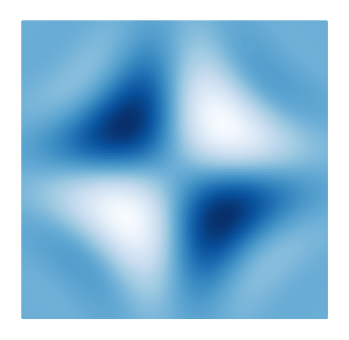

In [6]:
fig = plt.figure(figsize=(6,6))
plt.scatter(x, y, c=z, cmap='Blues_r', s=5)
plt.xticks([])
plt.yticks([])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.savefig('../figures/top-down-projection.png', dpi=300, bbox_inches='tight')

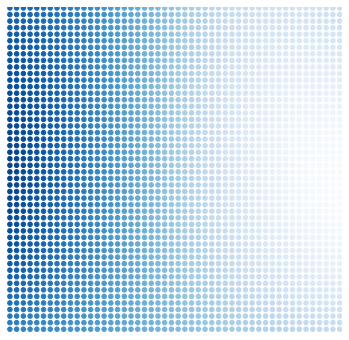

In [7]:
closeup_x = -0.2
closeup_y = 0.1
extend_x = 0.5
extend_y = 0.5

fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(x, y, c=z, cmap='Blues_r', s=20)
plt.xlim([closeup_x,closeup_x+extend_x])
plt.ylim([closeup_y,closeup_y+extend_y])
plt.xticks([])
plt.yticks([])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.savefig('../figures/top-down-projection-closeup.png', dpi=300, bbox_inches='tight')

In [ ]:
tic = time.perf_counter()

variance_data_top_down = analysis.compute_normalized_variance(data[:,0:2], 
                                                     z, 
                                                     depvar_names=['var'],
                                                     bandwidth_values=bandwidth_values)

cost_top_down = analysis.cost_function_normalized_variance_derivative(variance_data_top_down, 
                                                             penalty_function='log-sigma-over-peak', 
                                                             norm='max', 
                                                             integrate_to_peak=False)

toc = time.perf_counter()

print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

In [ ]:
print(cost_top_down)

<a id=projection-at-angle></a>
***

## Projection at an angle

[Go to the top](#top-page)

In [8]:
rotation_matrix = rotate_axes(np.pi/10, np.pi/10, 0)
rotated_data = np.dot(data, rotation_matrix)

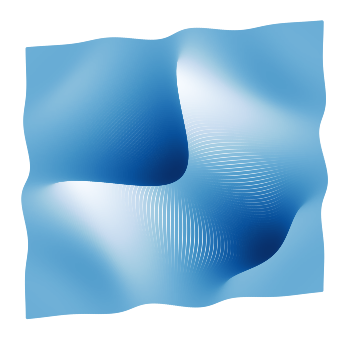

In [9]:
fig = plt.figure(figsize=(6,6))
plt.scatter(rotated_data[:,0], rotated_data[:,1], c=z.ravel(), cmap='Blues_r', s=5)
plt.xticks([])
plt.yticks([])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.savefig('../figures/projection-at-an-angle.png', dpi=300, bbox_inches='tight')

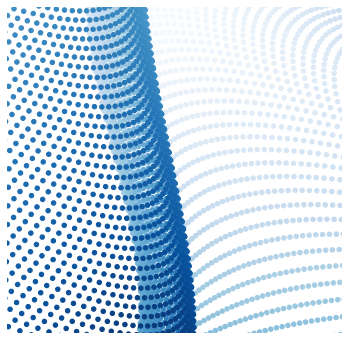

In [10]:
closeup_x = -0.2
closeup_y = 0.1
extend_x = 0.5
extend_y = 0.5

fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(rotated_data[:,0], rotated_data[:,1], c=z.ravel(), cmap='Blues_r', s=20)
plt.xlim([closeup_x,closeup_x+extend_x])
plt.ylim([closeup_y,closeup_y+extend_y])
plt.xticks([])
plt.yticks([])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.savefig('../figures/projection-at-an-angle-closeup.png', dpi=300, bbox_inches='tight')

In [ ]:
tic = time.perf_counter()

variance_data_rot = analysis.compute_normalized_variance(rotated_data[:,0:2],
                                                         z,
                                                         depvar_names=['var'],
                                                         bandwidth_values=bandwidth_values)

cost_rot = analysis.cost_function_normalized_variance_derivative(variance_data_rot,
                                                                 penalty_function='log-sigma-over-peak',
                                                                 norm='max',
                                                                 integrate_to_peak=False)

toc = time.perf_counter()

print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

In [ ]:
print(cost_rot)

***